In [45]:
# import pandas as pd
# import numpy as np

# percentiles = [0, 25, 50]

# data = []
# for percentile in percentiles:
#     with open(f"./percentile_{percentile}_eps.log") as f:
#         lines = f.readlines()
#         for line in lines:
#             eps_res = [percentile]
#             split = line.split(", ")
#             for eps in split:
#                 if "None" in eps:
#                     eps_res.append(np.nan)
#                 else:
#                     eps_res.append(float(eps))
#             data.append(eps_res)

# df = pd.DataFrame(data=data, columns=["percentile", "Q1", "Q2", "Q3", "Q4", "Q5"])
# df

In [46]:
# df = df.melt(id_vars="percentile", var_name="query", value_name="epsilon")
# df

In [47]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # plt.rcParams['figure.dpi'] = 300
# sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.6)
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"

In [48]:
# plt.rcParams["figure.figsize"] = [16, 3]

# g = sns.swarmplot(data=df, x="query", y="epsilon", hue="percentile", dodge=True, size=8)
# _ = g.set(xlabel=None, ylabel="Epsilon")
# _ = g.set_yticks([i for i in range(0, 11)])

# cords = [0.5, 1.5, 2.5, 3.5, 4.5]
# for x in cords:
#     plt.axvline(x=x, color="black", alpha=0.2, linewidth=1)

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.tight_layout()
# plt.savefig("figures/vary_percentile.pdf", bbox_inches = 'tight', pad_inches = 0.05)
# plt.show()
# plt.close()

In [49]:
import pandas as pd
import numpy as np

percentiles = [5, 25, 50, 75, 95]

data = []
for mech in  ["laplace", "gaussian"]:
    for percentile in percentiles:
        with open(f"result/{mech}_p_{percentile}_eps.log") as f:
            lines = f.readlines()
            for line in lines:
                eps_res = [mech, percentile]
                split = line.split(", ")
                for eps in split:
                    if "None" in eps:
                        eps_res.append(np.nan)
                    else:
                        eps_res.append(float(eps))
                data.append(eps_res)

df = pd.DataFrame(data=data, columns=["mech", "percentile", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,mech,percentile,Q1,Q2,Q3,Q4,Q5
0,laplace,5,0.06,0.1,0.04,0.07,0.02
1,laplace,5,0.08,0.1,0.10,0.06,0.07
2,laplace,5,0.09,0.1,0.07,0.05,0.08
3,laplace,5,0.09,0.1,0.10,0.04,0.09
4,laplace,5,0.08,0.2,0.08,0.05,0.07
...,...,...,...,...,...,...,...
495,gaussian,95,7.00,10.0,3.00,10.00,10.00
496,gaussian,95,9.00,10.0,8.00,7.00,10.00
497,gaussian,95,4.00,10.0,9.00,10.00,10.00
498,gaussian,95,7.00,10.0,4.00,10.00,10.00


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [51]:
df = df.melt(id_vars=["mech", "percentile"], var_name="query", value_name="epsilon")
df

,mech,percentile,query,epsilon
0,laplace,5,Q1,0.06
1,laplace,5,Q1,0.08
2,laplace,5,Q1,0.09
3,laplace,5,Q1,0.09
4,laplace,5,Q1,0.08
...,...,...,...,...
2495,gaussian,95,Q5,10.00
2496,gaussian,95,Q5,10.00
2497,gaussian,95,Q5,10.00
2498,gaussian,95,Q5,10.00


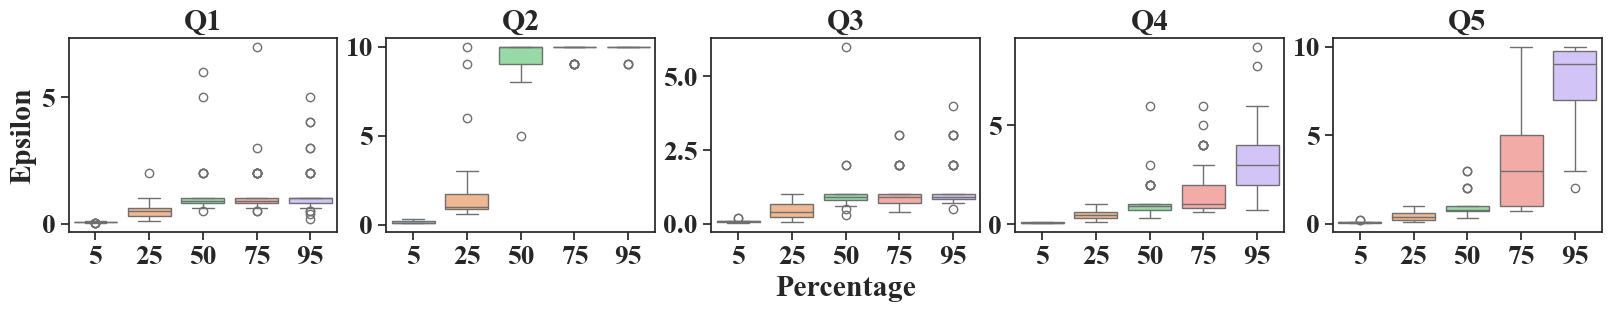

In [52]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "laplace")]
    g = sns.boxplot(data=data, x="percentile", y="epsilon", hue="percentile", ax=axes[i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Percentage")
    else:
        g.set(xlabel=None)
    
    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/vary_percentage_laplace.pdf", bbox_inches = 'tight')
plt.show()
plt.close()

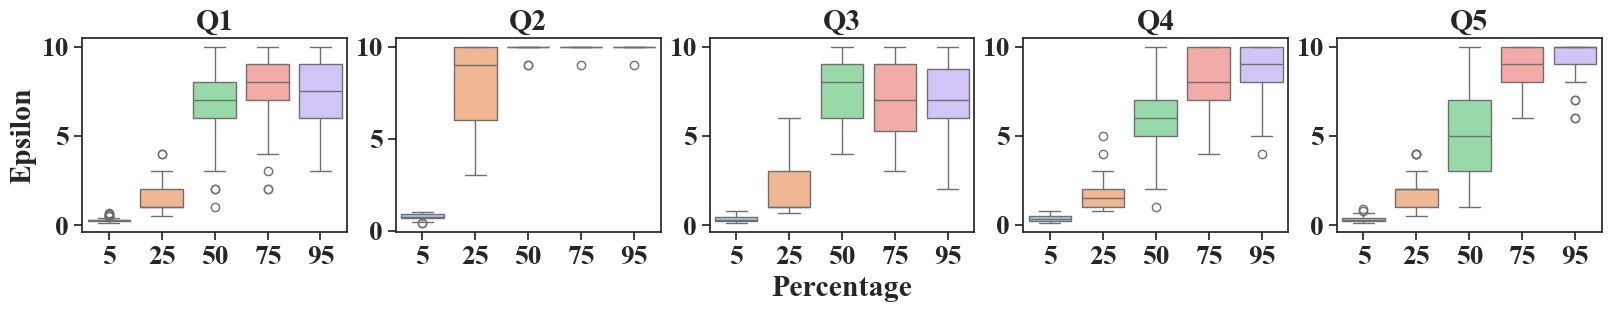

In [53]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[(df["query"] == "Q" + str(i+1)) & (df["mech"] == "gaussian")]
    g = sns.boxplot(data=data, x="percentile", y="epsilon", hue="percentile", ax=axes[i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Percentage")
    else:
        g.set(xlabel=None)
    
    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/vary_percentage_gaussian.pdf", bbox_inches = 'tight')
plt.show()
plt.close()

In [58]:
q5 = df[(df["query"] == "Q4") & (df["mech"] == "gaussian")]

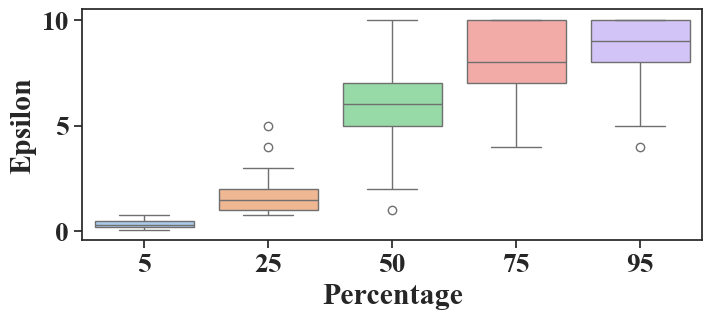

In [59]:
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

plt.rcParams["figure.figsize"] = [8, 3]
# fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)


g = sns.boxplot(data=q5, x="percentile", y="epsilon", hue="percentile", legend=False, palette="pastel")

g.set(ylabel="Epsilon")

g.set(xlabel="Percentage")

# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("figures/Q5.pdf", bbox_inches = 'tight')
plt.show()
plt.close()